In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix


In [2]:
import matplotlib.pyplot as plt
import random
import time
import cProfile, pstats, io
from pstats import SortKey

In [3]:
def dist_matrix_creator(data: np.ndarray, n: int, pad: float = 0.5) : 
    x_min = np.min(data[:,0])
    x_max = np.max(data[:,0])
    y_min = np.min(data[:,1])
    y_max = np.max(data[:,1])
    
    x_interval = (x_max - x_min) / n 
    y_interval = (y_max - y_min) / n
    
    x_pad = x_interval * pad
    y_pad = y_interval * pad
    
    lst_x = np.arange(x_min, x_max + x_interval, x_interval)
    lst_y = np.arange(y_min, y_max + y_interval, y_interval)    
    

    DIST = {}
    IDX_padding={}
    IDX_wo_padding={}
    
    

    for i in range(len(lst_x)-1) : 
        x_idx_padding = (lst_x[i] - x_pad <= data[:,0]) & (data[:,0]<= lst_x[i+1] + x_pad)
        x_idx_wo_padding = (lst_x[i] <= data[:,0]) & (data[:,0]<= lst_x[i+1])        
        
        for j in range(len(lst_y)-1) : 
            y_idx_padding = (lst_y[j] - y_pad <= data[:,1]) & (data[:,1]<= lst_y[j+1] + y_pad)
            y_idx_wo_padding = (lst_y[j] <= data[:,1]) & (data[:,1]<= lst_y[j+1])



            idx_clip_padding = idx[x_idx_padding & y_idx_padding]
            idx_clip_wo_padding = idx[x_idx_wo_padding & y_idx_wo_padding]


            data_clip = data[x_idx_padding & y_idx_padding]
            dist_matrix_clip = distance_matrix(data_clip, data_clip)    

            DIST[i,j] = dist_matrix_clip        
            IDX_padding[i,j] = idx_clip_padding
            IDX_wo_padding[i,j] = idx_clip_wo_padding
            
            

    
    
    return DIST, IDX_padding, IDX_wo_padding

In [4]:
def evaluation_dist_matrix_creator(data, N, pad:float = 1) : 
    start = time.time()    
    RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = pad)
    print("elapsted time :", time.time() - start)
    s = 0
    for k in RESULT.keys() : 
        s += RESULT[k].shape[0] * RESULT[k].shape[1]

    i = random.choice(range(N))
    j = random.choice(range(N))


    d_for_scatter = data[IDX_wo_padding[i,j]]
    d_for_scatter_padding = data[IDX_padding[i,j]]
    plt.figure(figsize=(10,10))
    plt.scatter(data[:,0], data[:,1])
    plt.scatter(d_for_scatter_padding[:,0], d_for_scatter_padding[:,1],color='grey')
    plt.scatter(d_for_scatter[:,0], d_for_scatter[:,1],color='red')
        
    print("size of dist_matrix with the original", len(data)**2)
    print("size of dist_matrix with the reduced", s)
    print("improved by the factor of", round(len(data)**2 / s,2))


# TEST WITH RANDOM DATA

In [23]:
#Data Preparation

data = np.random.rand(100000,2)
idx = np.arange(0,len(data),1)
data[:,0] = data[:,0] * 2
data[:,1] = data[:,1] * 2

In [24]:
print(data.shape)
data

(100000, 2)


array([[0.60115853, 1.79433505],
       [1.20143036, 1.34230448],
       [0.14022263, 0.09633731],
       ...,
       [0.39987272, 1.31938386],
       [0.67122488, 0.03882216],
       [0.09458173, 1.06986032]])

In [ ]:
evaluation_dist_matrix_creator(data, 10)

elapsted time : 2.0726780891418457
size of dist_matrix with the original 100000000
size of dist_matrix with the reduced 61461023
improved by the factor of 1.63


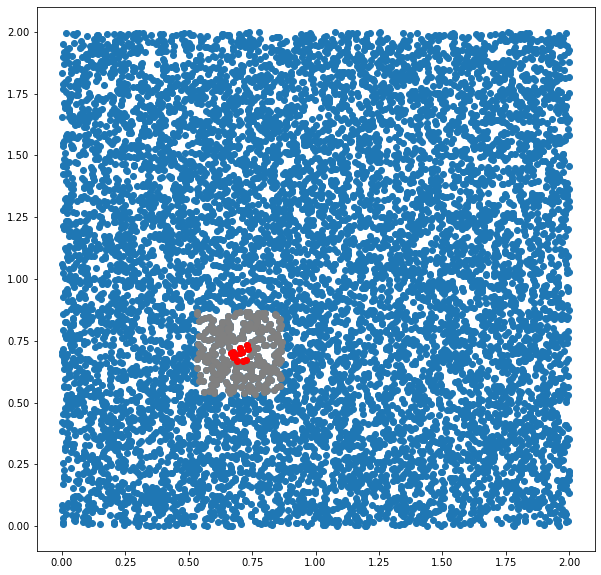

In [19]:
evaluation_dist_matrix_creator(data, 30, pad=2)

In [21]:
%%timeit
N=50
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 1)

342 ms ± 558 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
distance_matrix(data,data)

2.9 s ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:

pr = cProfile.Profile()
pr.enable()

N=300
#cProfiling from here
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, 50, pad = 1)
#cProfiling till here
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())



         70153 function calls in 0.378 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.378    0.126 /home/park/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3377(run_code)
        3    0.000    0.000    0.378    0.126 {built-in method builtins.exec}
        1    0.000    0.000    0.378    0.378 <ipython-input-20-72abb71a4996>:6(<module>)
        1    0.208    0.208    0.378    0.378 <ipython-input-8-d9f3d5a6ae23>:1(dist_matrix_creator)
     2500    0.009    0.000    0.165    0.000 /home/park/anaconda3/lib/python3.8/site-packages/scipy/spatial/kdtree.py:948(distance_matrix)
     2500    0.015    0.000    0.153    0.000 /home/park/anaconda3/lib/python3.8/site-packages/scipy/spatial/kdtree.py:55(minkowski_distance)
     2500    0.054    0.000    0.137    0.000 /home/park/anaconda3/lib/python3.8/site-packages/scipy/spatial/kdtree.py:12(minkowski_distance_p)
     2504  

elapsted time : 0.04729771614074707
size of dist_matrix with the original 100000000
size of dist_matrix with the reduced 1010570
improved by the factor of 98.95


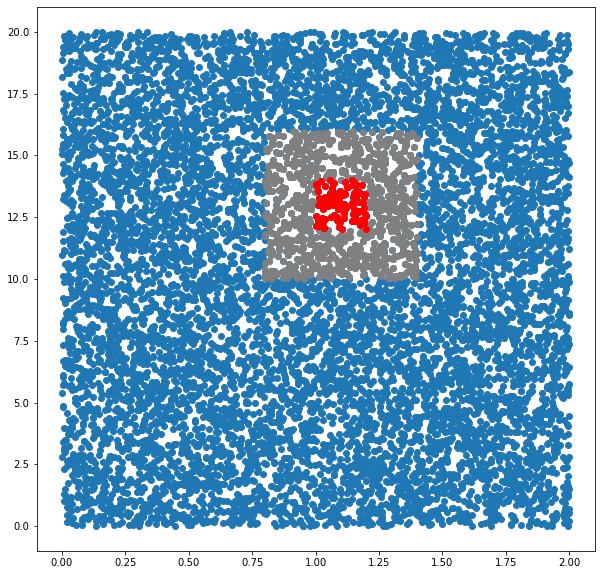

In [23]:
N=10
evaluation_dist_matrix_creator(data, N, pad=1)

elapsted time : 7.4834606647491455
size of dist_matrix with the original 100000000
size of dist_matrix with the reduced 11046
improved by the factor of 9053.05
         2565391 function calls (2564704 primitive calls) in 7.628 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    7.628    2.543 /home/park/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3377(run_code)
        3    0.000    0.000    7.628    2.543 {built-in method builtins.exec}
        1    0.050    0.050    7.628    7.628 <ipython-input-21-ddf47892bb4d>:7(<module>)
        1    0.035    0.035    7.578    7.578 <ipython-input-12-2d2bc0a6d059>:1(evaluation_dist_matrix_creator)
        1    5.216    5.216    7.483    7.483 <ipython-input-15-c2951bbe6a27>:1(dist_matrix_creator)
    90000    0.245    0.000    2.267    0.000 /home/park/anaconda3/lib/python3.8/site-packages/scipy/spatial/kdtree.py:948(distance_matr

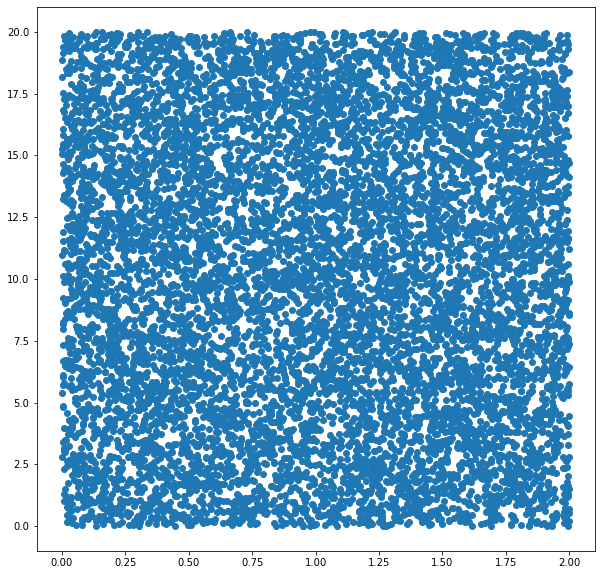

In [21]:

pr = cProfile.Profile()
pr.enable()

N=300
#cProfiling from here

evaluation_dist_matrix_creator(data, N, pad=1)
#cProfiling till here

pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())




In [37]:
N=100
command = 'RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 0.5)'
cProfile.run(command)
    

         280149 function calls in 1.126 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
    10000    0.008    0.000    0.171    0.000 <__array_function__ internals>:2(sum)
        1    0.726    0.726    1.095    1.095 <ipython-input-15-c2951bbe6a27>:1(dist_matrix_creator)
        1    0.031    0.031    1.126    1.126 <string>:1(<module>)
    60000    0.018    0.000    0.031    0.000 _asarray.py:14(asarray)
       10    0.000    0.000    0.000    0.000 cycler.py:227(<genexpr>)
    10000    0.002    0.000    0.002    0.000 fromnumeric.py:2100(_sum_dispatcher)
    10000    0.013    0.000    0.154    0.000 fromnumeric.py:2105(sum)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2584(_amax_dispatcher)
        2    0.000    0.000    0.000    0.000 fr

elapsted time : 0.35787034034729004
size of dist_matrix with the original 100000000
size of dist_matrix with the reduced 3188307
improved by the factor of 31.36


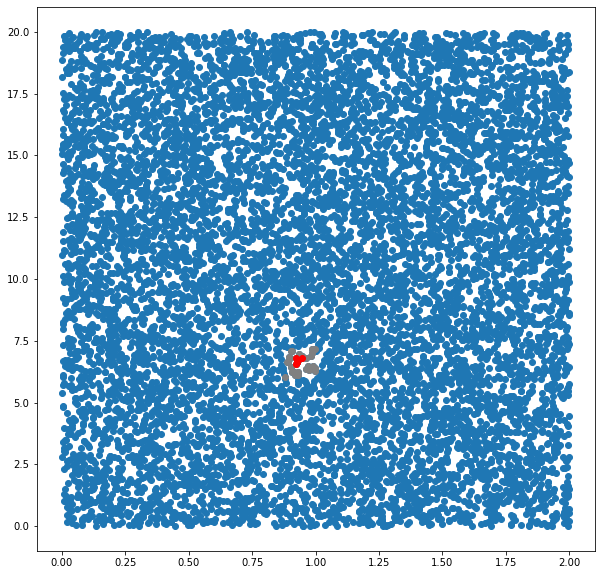

In [89]:
evaluation_dist_matrix_creator(data,50,1)

In [73]:
%%timeit
N=10
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 1)


2.76 s ± 8.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
%%timeit
N=200
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 1)


3.86 s ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [209]:

N=50
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 1)


In [234]:

IDX_argsort = IDX_padding[0,0][RESULT[0,0].argsort()]
idx_ = np.isin(IDX_argsort[:,0],IDX_wo_padding[0,0])
IDX_argsort[idx_]

array([[3338, 4611, 5324, 8250, 7769, 9840, 8265, 1530,  332, 6081, 5458],
       [4611, 5324, 3338, 8250, 9840, 7769,  332, 8265, 1530, 6081, 5458],
       [8250, 7769, 9840, 8265, 4611, 1530, 5324, 3338, 6081,  332, 5458]])

In [248]:
for key in IDX_padding.keys() : 
    IDX_argsort = IDX_padding[key][RESULT[key].argsort()]
    idx_ = np.isin(IDX_argsort[:,0],IDX_wo_padding[key]) #filter out to get only values within the box (excluding padding)
    IDX_argsort[idx_]



112 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [264]:
IDX_wo_padding[5,5]

array([2018, 4191, 5210, 5724])

In [318]:
str(key)

'(27, 27)'

In [321]:
def test() : 
    key=(random.choice(range(N)),random.choice(range(N)))
    print(key)
    print(IDX_wo_padding[key])
    
    
#     i = random.choice(range(len(IDX_wo_padding[key])))
    for i in range(len(IDX_wo_padding[key])) : 
    
        
        
        print(i, IDX_wo_padding[key][i])


        IDX_argsort = IDX_padding[key][RESULT[key].argsort()]
        idx_ = np.isin(IDX_argsort[:,0],IDX_wo_padding[key]) #filter out to get only values within the box (excluding padding)
        ix_ = IDX_argsort[idx_]



        plt.figure(figsize=(15,15))
        plt.scatter(data[:,0], data[:,1], color='grey', s=0.1)
        plt.scatter(data[IDX_padding[key]][:,0], data[IDX_padding[key]][:,1], color='darkgrey', s=5)
        plt.scatter(data[ix_[i]][:10,0], data[ix_[i]][:10,1], color='blue', s=10)
        plt.scatter(data[ix_[i]][0,0], data[ix_[i]][0,1], color='red', s=20)
        
        plt.savefig(
            str(key) + str(IDX_wo_padding[key][i]) + '.png'
        )




In [335]:
x=np.linspace(0,5,100)
y=np.sin(x)
plt.figure()
plt.ion()
plt.plot(x,y)
plt.title("Plot generated using Matplotlib")
plt.xlabel("x")
plt.ylabel("sinx")
plt.close()
plt.savefig("Plot generated using Matplotlib.png")

<Figure size 432x288 with 0 Axes>

In [341]:
from pylab import figure, title, show, scatter

figure(figsize=(15,15))
scatter(data[:,0], data[:,1], color='grey', s=0.1)
scatter(data[IDX_padding[key]][:,0], data[IDX_padding[key]][:,1], color='darkgrey', s=5)
scatter(data[ix_[i]][:10,0], data[ix_[i]][:10,1], color='blue', s=10)
scatter(data[ix_[i]][0,0], data[ix_[i]][0,1], color='red', s=20)
title(str(key) + str(IDX_wo_padding[key][i]))
plt.savefig("Plot generated using Matplotlib.png")
plt.close()


In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(data[:,0], data[:,1], color='grey', s=0.1)
plt.scatter(data[IDX_padding[key]][:,0], data[IDX_padding[key]][:,1], color='darkgrey', s=5)
plt.scatter(data[ix_[i]][:10,0], data[ix_[i]][:10,1], color='blue', s=10)
plt.scatter(data[ix_[i]][0,0], data[ix_[i]][0,1], color='red', s=20)

In [342]:
def test() : 
    for key in IDX_wo_padding.keys() : 
        print(key)
        print(IDX_wo_padding[key])


    #     i = random.choice(range(len(IDX_wo_padding[key])))
        for i in range(len(IDX_wo_padding[key])) : 



            print(i, IDX_wo_padding[key][i])


            IDX_argsort = IDX_padding[key][RESULT[key].argsort()]
            idx_ = np.isin(IDX_argsort[:,0],IDX_wo_padding[key]) #filter out to get only values within the box (excluding padding)
            ix_ = IDX_argsort[idx_]



            plt.figure(figsize=(15,15))
            plt.scatter(data[:,0], data[:,1], color='grey', s=0.1)
            plt.scatter(data[IDX_padding[key]][:,0], data[IDX_padding[key]][:,1], color='darkgrey', s=5)
            plt.scatter(data[ix_[i]][:10,0], data[ix_[i]][:10,1], color='blue', s=10)
            plt.scatter(data[ix_[i]][0,0], data[ix_[i]][0,1], color='red', s=20)

            plt.savefig(
                str(key) + str(IDX_wo_padding[key][i]) + '.png'
            )            
            plt.close()





In [ ]:
test()

(0, 0)
[3338 4611 8250]
0 3338
1 4611
2 8250
(0, 1)
[5324 9840]
0 5324
1 9840
(0, 2)
[3143 5757]
0 3143
1 5757
(0, 3)
[1624 5794]
0 1624
1 5794
(0, 4)
[9135 9745]
0 9135
1 9745
(0, 5)
[4146 4422 6287]
0 4146
1 4422
2 6287
(0, 6)
[2991 8504 9454]
0 2991
1 8504
2 9454
(0, 7)
[3385 3898 5616]
0 3385
1 3898
2 5616
(0, 8)
[5542 8260 9567]
0 5542
1 8260
2 9567
(0, 9)
[1491 7651 9341]
0 1491
1 7651
2 9341
(0, 10)
[1257]
0 1257
(0, 11)
[5036 5164 5199 6382]
0 5036
1 5164
2 5199
3 6382
(0, 12)
[1563 2565 4136 6320 8125 8204 9735]
0 1563
1 2565
2 4136
3 6320
4 8125
5 8204
6 9735
(0, 13)
[3474 5418 7598 7743 8693]
0 3474
1 5418
2 7598
3 7743
4 8693
(0, 14)
[ 174  983 3600 3740 9971]
0 174
1 983
2 3600
3 3740
4 9971
(0, 15)
[6409 6815 8655]
0 6409
1 6815
2 8655
(0, 16)
[6299]
0 6299
(0, 17)
[ 158  610 2650 4503 5363 7452]
0 158
1 610
2 2650
3 4503
4 5363
5 7452
(0, 18)
[1645 5511 5533 8958]
0 1645
1 5511
2 5533
3 8958
(0, 19)
[2744]
0 2744
(0, 20)
[2781 3084 3367 5083]
0 2781
1 3084
2 3367
3 5083


2 8497
(2, 44)
[1079 1692 2104]
0 1079
1 1692
2 2104
(2, 45)
[7212 7467 7756 8923]
0 7212
1 7467
2 7756
3 8923
(2, 46)
[1367 2229 3895 5109 8983]
0 1367
1 2229
2 3895
3 5109
4 8983
(2, 47)
[3636 4632 4784 5961 5996 7008 8965 9438]
0 3636
1 4632
2 4784
3 5961
4 5996
5 7008
6 8965
7 9438
(2, 48)
[1049 2109 4415 4765 6629 9932]
0 1049
1 2109
2 4415
3 4765
4 6629
5 9932
(2, 49)
[2123 8280 9031]
0 2123
1 8280
2 9031
(3, 0)
[1107 2369 6194 7055 9217]
0 1107
1 2369
2 6194
3 7055
4 9217
(3, 1)
[6971 9929]
0 6971
1 9929
(3, 2)
[1681 4412 5235 8556]
0 1681
1 4412
2 5235
3 8556
(3, 3)
[6873 8611]
0 6873
1 8611
(3, 4)
[3050]
0 3050
(3, 5)
[2759 8578]
0 2759
1 8578
(3, 6)
[2612 3815 8569 8862 9758]
0 2612
1 3815
2 8569
3 8862
4 9758
(3, 7)
[1370 2412 6169 6324 8680 9051]
0 1370
1 2412
2 6169
3 6324
4 8680
5 9051
(3, 8)
[ 292 6888]
0 292
1 6888
(3, 9)
[1046 5529 7201]
0 1046
1 5529
2 7201
(3, 10)
[ 377 3705 5815 6805 8685]
0 377
1 3705
2 5815
3 6805
4 8685
(3, 11)
[4124]
0 4124
(3, 12)
[ 244 1574 84

2 5545
3 7295
4 8815
(5, 38)
[]
(5, 39)
[1391 2206 9997]
0 1391
1 2206
2 9997
(5, 40)
[ 732 1189 3923]
0 732
1 1189
2 3923
(5, 41)
[1842 5334 7531 7654]
0 1842
1 5334
2 7531
3 7654
(5, 42)
[2874 3781]
0 2874
1 3781
(5, 43)
[3470 5263 7070 7604 9272]
0 3470
1 5263
2 7070
3 7604
4 9272
(5, 44)
[ 144 4591]
0 144
1 4591
(5, 45)
[2641 2815 2915 7158]
0 2641
1 2815
2 2915
3 7158
(5, 46)
[7857 9988]
0 7857
1 9988
(5, 47)
[1374 1944 3412 6836 9592]
0 1374
1 1944
2 3412
3 6836
4 9592
(5, 48)
[  65 3016 3314 8469]
0 65
1 3016
2 3314
3 8469
(5, 49)
[ 876 3991 5064 6587 8593 9015 9145 9638]
0 876
1 3991
2 5064
3 6587
4 8593
5 9015
6 9145
7 9638
(6, 0)
[9671 9964]
0 9671
1 9964
(6, 1)
[ 284 1042 3764 8921]
0 284
1 1042
2 3764
3 8921
(6, 2)
[1948 8594 8599]
0 1948
1 8594
2 8599
(6, 3)
[6041]
0 6041
(6, 4)
[4704 6884 8715 9345]
0 4704
1 6884
2 8715
3 9345
(6, 5)
[2224 5141 6445 6468]
0 2224
1 5141
2 6445
3 6468
(6, 6)
[  87 1543 9165]
0 87
1 1543
2 9165
(6, 7)
[ 191  704 1015 2579 3946 6562 7700]
0 1

3 6375
4 7967
5 8167
(8, 32)
[ 785 1982 4147 8705]
0 785
1 1982
2 4147
3 8705
(8, 33)
[ 103  336  633 8444 9289 9444 9602]
0 103
1 336
2 633
3 8444
4 9289
5 9444
6 9602
(8, 34)
[3223 3879 5684 6539]
0 3223
1 3879
2 5684
3 6539
(8, 35)
[ 648  980 2635 2886 8984 9415]
0 648
1 980
2 2635
3 2886
4 8984
5 9415
(8, 36)
[ 494 2525 5612 6211 6794 7172]
0 494
1 2525
2 5612
3 6211
4 6794
5 7172
(8, 37)
[  46 7945 8660 9469 9525]
0 46
1 7945
2 8660
3 9469
4 9525
(8, 38)
[ 293 1916 4496 4846 5636 6909 8438 8650]
0 293
1 1916
2 4496
3 4846
4 5636
5 6909
6 8438
7 8650
(8, 39)
[1522 3992 4402]
0 1522
1 3992
2 4402
(8, 40)
[1379 4260 7861 8326]
0 1379
1 4260
2 7861
3 8326
(8, 41)
[ 517 3059 3234 4332 6764 7103 9956]
0 517
1 3059
2 3234
3 4332
4 6764
5 7103
6 9956
(8, 42)
[ 629 1663 6707 8199 9557]
0 629
1 1663
2 6707
3 8199
4 9557
(8, 43)
[ 289 2875 3963 4027 5510 5703 6599 6833]
0 289
1 2875
2 3963
3 4027
4 5510
5 5703
6 6599
7 6833
(8, 44)
[]
(8, 45)
[3653 3706 3791]
0 3653
1 3706
2 3791
(8, 46)
[13